In [72]:
# For inline graphs
%matplotlib inline

## Imports

# pandas, numpy
import pandas as pd
import numpy as np

# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

# Matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Missingno
import missingno as mno

In [73]:
# Load the different files
df_marketing = pd.DataFrame(pd.read_csv('../input/Marketing.csv', encoding="ISO-8859-1"))
#df_immatriculations = pan.DataFrame(pan.read_csv('../input/Immatriculations.csv', encoding="ISO-8859-1"))
df_clients = pd.DataFrame(pd.read_csv('../input/Clients_0.csv', encoding="ISO-8859-1"))
#df_catalogue = pan.DataFrame(pan.read_csv('../input/Catalogue.csv', encoding="ISO-8859-1"))

df_clients.dtypes

age                   object
sexe                  object
taux                  object
situationFamiliale    object
nbEnfantsAcharge      object
2eme voiture          object
immatriculation       object
dtype: object

In [74]:
df_clients.shape

(100000, 7)

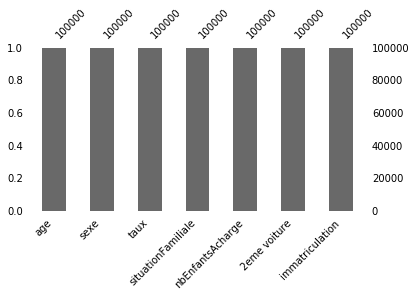

In [75]:
## Check missing data for each DF
##mno.bar(df=df_marketing, figsize=(6, 3), fontsize=10)
mno.bar(df=df_clients, figsize=(6, 3), fontsize=10)
#mno.bar(df=df_catalogue, figsize=(6, 3), fontsize=10)
#mno.bar(df=df_immatriculations, figsize=(6, 3), fontsize=10)

# See no NaN data in the 4 datasets, nice BUT there is : '?', 'N/D', ' ' hard written in it

In [76]:
df_clients['sexe'] = df_clients['sexe'].replace(['M', 'Homme', 'Masculin'], "Homme")
df_clients['sexe'] = df_clients['sexe'].replace(['F', 'Féminin', 'Femme'], "Femme")
df_clients['sexe'] = df_clients['sexe'].replace(['?', 'N/D', ' '], np.nan)

dfSexeClients = pd.get_dummies(df_clients['sexe'])
df_clients = pd.concat([df_clients, dfSexeClients], axis=1).drop(['sexe'] , axis=1)

df_clients.head()

,age,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme
0,44,476,En Couple,0,false,3176 TS 67,0,1
1,20,422,En Couple,2,false,3721 QS 49,0,1
2,49,221,Célibataire,0,false,9099 UV 26,1,0
3,57,246,Célibataire,0,false,3563 LA 55,0,1
4,58,1149,Célibataire,0,false,6963 AX 34,0,1


In [77]:
df_clients['situationFamiliale'] = df_clients['situationFamiliale'].replace(['Célibataire', 'Seule', 'Seul', '?', ' ', 'Divorcée', 'N/D'], "Célibataire")

dfSituationFamillialeClients = pd.get_dummies(df_clients['situationFamiliale'])
df_clients = pd.concat([df_clients, dfSituationFamillialeClients], axis=1).drop(['situationFamiliale'] , axis=1)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,false,3176 TS 67,0,1,0,1,0
1,20,422,2,false,3721 QS 49,0,1,0,1,0
2,49,221,0,false,9099 UV 26,1,0,1,0,0
3,57,246,0,false,3563 LA 55,0,1,1,0,0
4,58,1149,0,false,6963 AX 34,0,1,1,0,0


In [78]:
df_clients['2eme voiture'] = df_clients['2eme voiture'].replace(['true'], 1)
df_clients['2eme voiture'] = df_clients['2eme voiture'].replace(['false', ' ', '?'], 0)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [79]:
#df_clients['immatriculation_num'] = df_clients['immatriculation'].apply(lambda x : x.split(' ')[2]).astype(np.int64)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [80]:
df_clients['nbEnfantsAcharge'] = df_clients['nbEnfantsAcharge'].replace(['-1', ' ', '?'], '0').astype(int)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476,0,0,3176 TS 67,0,1,0,1,0
1,20,422,2,0,3721 QS 49,0,1,0,1,0
2,49,221,0,0,9099 UV 26,1,0,1,0,0
3,57,246,0,0,3563 LA 55,0,1,1,0,0
4,58,1149,0,0,6963 AX 34,0,1,1,0,0


In [81]:
# Little function to check if there something else than ints in the object types as ' ' or '?' etc
def checkIfInt(s):
    try: 
        int(s)
        return 
    except ValueError:
        print(s)
        return 

In [82]:
dfTauxClients = df_clients[((df_clients.taux != ' ') & (df_clients.taux != '?') & (df_clients.taux != '-1'))]
meanTauxClients = dfTauxClients.taux.astype(np.float64).mean()

df_clients['taux'] = df_clients['taux'].replace([' ', '?', '-1'], meanTauxClients)
df_clients['taux'] = df_clients['taux'].astype(np.float64)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,3176 TS 67,0,1,0,1,0
1,20,422.0,2,0,3721 QS 49,0,1,0,1,0
2,49,221.0,0,0,9099 UV 26,1,0,1,0,0
3,57,246.0,0,0,3563 LA 55,0,1,1,0,0
4,58,1149.0,0,0,6963 AX 34,0,1,1,0,0


In [83]:
dfAgeClients = df_clients[((df_clients.age != ' ') & (df_clients.age != '?') & (df_clients.age != '-1'))]
meanAgeClients = dfAgeClients.age.astype(np.int64).mean()

df_clients['age'] = df_clients['age'].replace([' ', '?', '-1'], meanAgeClients)
df_clients['age'] = df_clients['age'].astype(np.int64)

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,immatriculation,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,3176 TS 67,0,1,0,1,0
1,20,422.0,2,0,3721 QS 49,0,1,0,1,0
2,49,221.0,0,0,9099 UV 26,1,0,1,0,0
3,57,246.0,0,0,3563 LA 55,0,1,1,0,0
4,58,1149.0,0,0,6963 AX 34,0,1,1,0,0


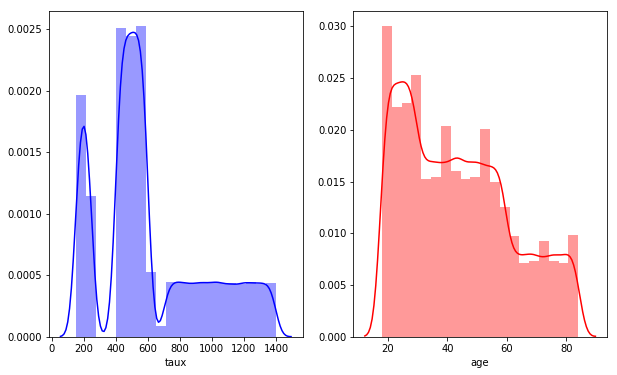

In [84]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax1,ax2 = ax.flatten()
sns.distplot(df_clients['taux'],bins=20,ax=ax1,color='b')
sns.distplot(df_clients['age'],bins=20,ax=ax2,color='r')
plt.show()

In [85]:
df_imma_copy = df_clients['immatriculation'].copy()
df_clients = df_clients.drop(['immatriculation'] , axis=1)
df_clients.head(5)

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,0,1,0,1,0
1,20,422.0,2,0,0,1,0,1,0
2,49,221.0,0,0,1,0,1,0,0
3,57,246.0,0,0,0,1,1,0,0
4,58,1149.0,0,0,0,1,1,0,0


In [86]:
df_clients.describe()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,43.710880,609.807481,1.25189,0.130750,0.297490,0.699420,0.353500,0.63994,0.006560
std,18.216331,334.599826,1.39054,0.337128,0.457156,0.458513,0.478059,0.48002,0.080728
min,18.000000,150.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,28.000000,422.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,42.000000,523.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000
75%,56.000000,826.000000,2.00000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,84.000000,1399.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec96d7a748>],
      dtype=object)

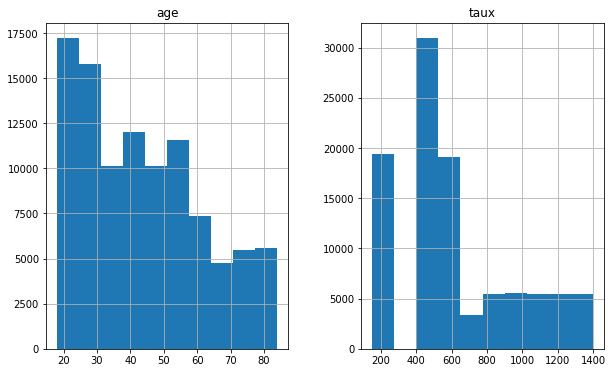

In [87]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
ax1,ax2 = ax.flatten()

df_clients.hist(column="age", ax=ax1)
df_clients.hist(column="taux", ax=ax2)

In [88]:
#df_clients['age'] = pan.qcut(df_clients['age'],5,labels=[0,1,2,3,4]).astype(int)
#df_clients['taux'] = pan.qcut(df_clients['taux'],5,labels=[0,1,2,3,4]).astype(int)

print(df_clients['age'].value_counts())
print(df_clients['taux'].value_counts())

29    2527
19    2525
20    2497
28    2488
26    2487
27    2483
24    2481
25    2475
21    2447
18    2433
23    2424
22    2409
43    1978
59    1767
35    1754
49    1722
40    1714
39    1708
45    1699
50    1699
36    1689
47    1684
33    1683
52    1679
51    1675
32    1674
31    1673
56    1672
38    1671
48    1670
      ... 
54    1634
41    1628
53    1628
58    1618
57    1612
76     866
81     837
80     828
61     827
69     822
68     818
82     818
64     807
66     802
62     802
83     801
73     798
84     797
67     796
70     786
77     784
63     779
74     772
75     763
79     760
71     759
78     753
60     752
65     751
72     731
Name: age, Length: 67, dtype: int64
544.0     295
448.0     284
555.0     282
402.0     282
509.0     279
521.0     278
497.0     277
501.0     277
576.0     275
586.0     275
453.0     273
439.0     272
546.0     272
424.0     271
590.0     271
455.0     271
577.0     271
423.0     270
572.0     270
594.0     269
409.0     269

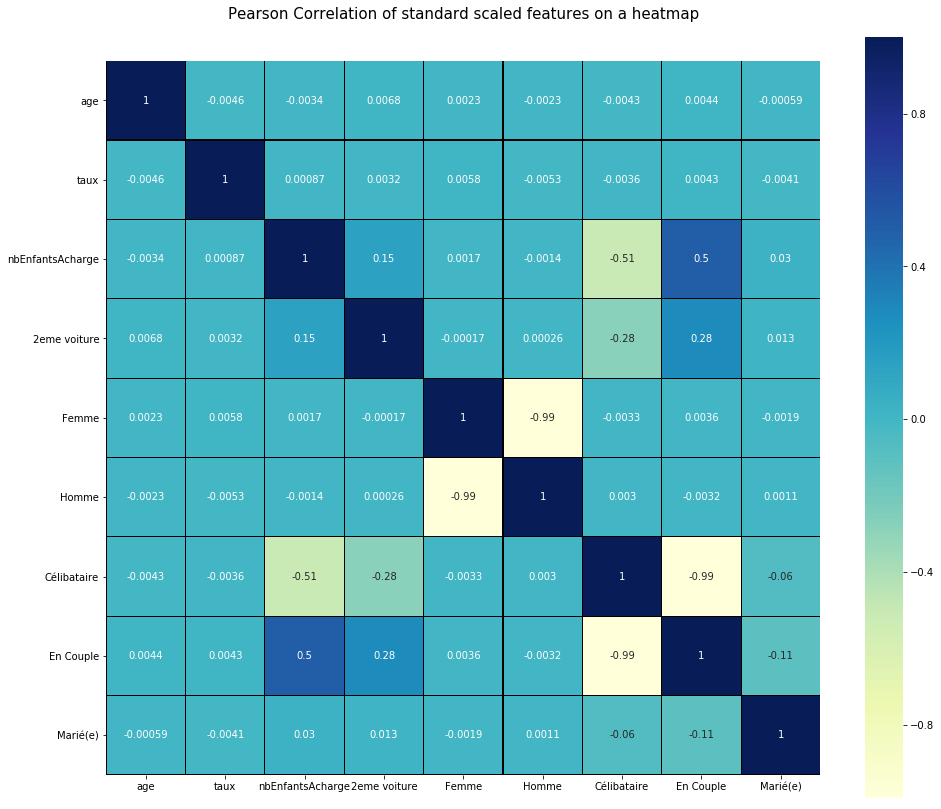

In [89]:
# Heatmap to see differents correlations between data
plt.figure(figsize=(16, 14))
plt.title('Pearson Correlation of standard scaled features on a heatmap', y=1.05, size=15)
sns.heatmap(df_clients.corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='black', annot=True, cmap="YlGnBu")

In [90]:
df_clients.dtypes

age                   int64
taux                float64
nbEnfantsAcharge      int64
2eme voiture          int64
Femme                 uint8
Homme                 uint8
Célibataire           uint8
En Couple             uint8
Marié(e)              uint8
dtype: object

In [91]:
df_clients = pd.concat([df_clients, df_imma_copy], axis=1)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),immatriculation
0,44,476.0,0,0,0,1,0,1,0,3176 TS 67
1,20,422.0,2,0,0,1,0,1,0,3721 QS 49
2,49,221.0,0,0,1,0,1,0,0,9099 UV 26
3,57,246.0,0,0,0,1,1,0,0,3563 LA 55
4,58,1149.0,0,0,0,1,1,0,0,6963 AX 34


In [92]:
df_imma_cluster = pd.DataFrame(pd.read_csv('../input/immatriculation_and_cluster.csv', encoding="ISO-8859-1"))
df_imma_cluster.head()

,immatriculation,cluster_predicted
0,3176 TS 67,0
1,3721 QS 49,3
2,9099 UV 26,0
3,3563 LA 55,1
4,6963 AX 34,1


In [93]:
# ajout du cluster de leur véhicule
df_clients = df_clients.merge(df_imma_cluster, left_on="immatriculation", right_on="immatriculation", how="inner")
df_clients = df_clients.drop(['immatriculation'], axis=1)
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),cluster_predicted
0,44,476.0,0,0,0,1,0,1,0,0
1,20,422.0,2,0,0,1,0,1,0,3
2,49,221.0,0,0,1,0,1,0,0,0
3,57,246.0,0,0,0,1,1,0,0,1
4,58,1149.0,0,0,0,1,1,0,0,1


In [94]:
df_marketing['sexe'] = df_marketing['sexe'].replace(['M', 'Homme', 'Masculin'], "Homme")
df_marketing['sexe'] = df_marketing['sexe'].replace(['F', 'Féminin', 'Femme'], "Femme")
df_marketing['sexe'] = df_marketing['sexe'].replace(['?', 'N/D', ' '], np.nan)

dfSexeMarketing = pd.get_dummies(df_marketing['sexe'])
df_marketing = pd.concat([df_marketing, dfSexeMarketing], axis=1).drop(['sexe'] , axis=1)

df_marketing['situationFamiliale'] = df_marketing['situationFamiliale'].replace(['Célibataire', 'Seule', 'Seul', '?', ' ', 'Divorcée', 'N/D'], "Célibataire")

dfSituationFamillialeMarketing = pd.get_dummies(df_marketing['situationFamiliale'])
df_marketing = pd.concat([df_marketing, dfSituationFamillialeMarketing], axis=1).drop(['situationFamiliale'] , axis=1)

df_marketing['2eme voiture'] = df_marketing['2eme voiture'].replace(['true'], 1).astype(np.int64)
df_marketing['2eme voiture'] = df_marketing['2eme voiture'].replace(['false', ' ', '?'], 0).astype(np.int64)

df_marketing['nbEnfantsAcharge'] = df_marketing['nbEnfantsAcharge'].replace(['-1', ' ', '?'], '0').astype(int)

df_marketing['taux'] = df_marketing['taux'].replace([' ', '?', '-1'], meanTauxClients)
df_marketing['taux'] = df_marketing['taux'].astype(np.float64)

df_marketing['age'] = df_marketing['age'].replace([' ', '?', '-1'], meanAgeClients)
df_marketing['age'] = df_marketing['age'].astype(np.int64)

df_marketing['Marié(e)'] = 0
df_marketing['Marié(e)'] = df_marketing['Marié(e)'].astype(np.uint8)

df_marketing.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,21,1396.0,0,0,1,0,1,0,0
1,35,223.0,0,0,0,1,1,0,0
2,48,401.0,0,0,0,1,1,0,0
3,26,420.0,3,1,1,0,0,1,0
4,80,530.0,3,0,0,1,0,1,0


In [95]:
df_marketing.dtypes

age                   int64
taux                float64
nbEnfantsAcharge      int64
2eme voiture          int64
Femme                 uint8
Homme                 uint8
Célibataire           uint8
En Couple             uint8
Marié(e)              uint8
dtype: object

In [96]:
## On découpe notre df de train entre les datas

df_client_cluster_pred_copy = df_clients['cluster_predicted'].copy()
df_clients = df_clients.drop(['cluster_predicted'], axis=1)

column_save = df_clients.columns

df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,44,476.0,0,0,0,1,0,1,0
1,20,422.0,2,0,0,1,0,1,0
2,49,221.0,0,0,1,0,1,0,0
3,57,246.0,0,0,0,1,1,0,0
4,58,1149.0,0,0,0,1,1,0,0


In [97]:
df_client_cluster_pred_copy.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         3
2         0
3         1
4         1
5         4
6         0
7         1
8         1
9         1
10        1
11        4
12        1
13        3
14        0
15        4
16        4
17        2
18        1
19        0
20        2
21        4
22        0
23        0
24        0
25        2
26        2
27        1
28        1
29        2
         ..
100297    3
100298    0
100299    1
100300    0
100301    4
100302    1
100303    3
100304    4
100305    4
100306    3
100307    0
100308    0
100309    2
100310    0
100311    1
100312    1
100313    3
100314    0
100315    2
100316    0
100317    0
100318    1
100319    0
100320    1
100321    4
100322    2
100323    1
100324    1
100325    3
100326    1
Name: cluster_predicted, Length: 100327, dtype: int64>

In [98]:
## on normalise la data avant d'appliquer un algo dessus

from sklearn.preprocessing import StandardScaler

#mat_clients = df_clients.as_matrix()
#mat_marketing = df_marketing.as_matrix()

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(df_clients)

data_clients = scaler.transform(df_clients)
data_marketing = scaler.transform(df_marketing)

data_marketing

array([[-1.24647707,  2.35013892, -0.90019105, -0.38777247,  1.53664041,
        -1.52535656,  1.35236893, -1.3332099 , -0.08118961],
       [-0.47792315, -1.15594387, -0.90019105, -0.38777247, -0.65077034,
         0.65558442,  1.35236893, -1.3332099 , -0.08118961],
       [ 0.23573405, -0.62390403, -0.90019105, -0.38777247, -0.65077034,
         0.65558442,  1.35236893, -1.3332099 , -0.08118961],
       [-0.97199353, -0.56711326,  1.25749312,  2.57883184,  1.53664041,
        -1.52535656, -0.73944319,  0.75006944, -0.08118961],
       [ 1.9924287 , -0.23832459,  1.25749312, -0.38777247, -0.65077034,
         0.65558442, -0.73944319,  0.75006944, -0.08118961],
       [-0.91709682, -1.36517302,  0.53826507, -0.38777247,  1.53664041,
        -1.52535656, -0.73944319,  0.75006944, -0.08118961],
       [ 0.83959784, -0.1127871 ,  0.53826507, -0.38777247,  1.53664041,
        -1.52535656, -0.73944319,  0.75006944, -0.08118961],
       [-0.03874949, -0.53423439, -0.90019105, -0.38777247,  1

In [99]:
## on les remets en df panda pour taffer dessus

df_marketing_copy = df_marketing.copy()

df_clients   = pd.DataFrame(data_clients, columns=column_save)
df_marketing = pd.DataFrame(data_marketing, columns=column_save)

In [100]:
df_clients.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,0.016147,-0.399730,-0.900191,-0.387772,-0.65077,0.655584,-0.739443,0.750069,-0.08119
1,-1.301374,-0.561135,0.538265,-0.387772,-0.65077,0.655584,-0.739443,0.750069,-0.08119
2,0.290631,-1.161922,-0.900191,-0.387772,1.53664,-1.525357,1.352369,-1.333210,-0.08119
3,0.729804,-1.087197,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119
4,0.784701,1.611859,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119


In [101]:
df_marketing.head()

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e)
0,-1.246477,2.350139,-0.900191,-0.387772,1.53664,-1.525357,1.352369,-1.333210,-0.08119
1,-0.477923,-1.155944,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119
2,0.235734,-0.623904,-0.900191,-0.387772,-0.65077,0.655584,1.352369,-1.333210,-0.08119
3,-0.971994,-0.567113,1.257493,2.578832,1.53664,-1.525357,-0.739443,0.750069,-0.08119
4,1.992429,-0.238325,1.257493,-0.387772,-0.65077,0.655584,-0.739443,0.750069,-0.08119


In [102]:
df_marketing.shape

(20, 9)

In [103]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# CatBoostClassifier function
def runCatBoostClassifier(x_train, y_train, x_test, depth):
    
    # init classification variable
    #classif_report = 0
    
    # init CatBoostClassifier
    model=CatBoostClassifier(iterations=4000,
                            learning_rate=0.02,
                            depth=depth 
                            ,loss_function="MultiClass",
                            #od_type="IncToDec",
                            #od_pval=1,
                            #od_wait=400
                            )
    
    # fit the model
    model.fit(x_train, y_train)
    # predit output
    y_test = model.predict(x_test)
    
    # build dataframe for classification report
    #y_pred = model.predict(x_train)
    
    # build classification report
    #classif_report = classification_report(y_train_cr, y_pred)
    
    return y_test

In [104]:
# run the catboostclassifier
marketing_cluster_pred = runCatBoostClassifier(df_clients, df_client_cluster_pred_copy, df_marketing, 8)

0:	learn: -1.5721214	total: 150ms	remaining: 9m 59s
1:	learn: -1.5374561	total: 324ms	remaining: 10m 47s
2:	learn: -1.5051069	total: 538ms	remaining: 11m 56s
3:	learn: -1.4748027	total: 712ms	remaining: 11m 51s
4:	learn: -1.4463199	total: 920ms	remaining: 12m 15s
5:	learn: -1.4194718	total: 1.13s	remaining: 12m 31s
6:	learn: -1.3942293	total: 1.34s	remaining: 12m 42s
7:	learn: -1.3701891	total: 1.53s	remaining: 12m 44s
8:	learn: -1.3473745	total: 1.74s	remaining: 12m 50s
9:	learn: -1.3258129	total: 1.92s	remaining: 12m 47s
10:	learn: -1.3051490	total: 2.12s	remaining: 12m 48s
11:	learn: -1.2855620	total: 2.3s	remaining: 12m 44s
12:	learn: -1.2668159	total: 2.51s	remaining: 12m 50s
13:	learn: -1.2488077	total: 2.68s	remaining: 12m 43s
14:	learn: -1.2315690	total: 2.88s	remaining: 12m 45s
15:	learn: -1.2151507	total: 3.06s	remaining: 12m 42s
16:	learn: -1.1993631	total: 3.27s	remaining: 12m 45s
17:	learn: -1.1842365	total: 3.44s	remaining: 12m 42s
18:	learn: -1.1696024	total: 3.64s	remai

152:	learn: -0.6936145	total: 34.7s	remaining: 14m 31s
153:	learn: -0.6930760	total: 34.9s	remaining: 14m 30s
154:	learn: -0.6926697	total: 35.1s	remaining: 14m 30s
155:	learn: -0.6921942	total: 35.3s	remaining: 14m 30s
156:	learn: -0.6917612	total: 35.7s	remaining: 14m 33s
157:	learn: -0.6914391	total: 36.1s	remaining: 14m 38s
158:	learn: -0.6910627	total: 36.3s	remaining: 14m 37s
159:	learn: -0.6906643	total: 36.5s	remaining: 14m 36s
160:	learn: -0.6902364	total: 36.7s	remaining: 14m 35s
161:	learn: -0.6898624	total: 36.9s	remaining: 14m 34s
162:	learn: -0.6895857	total: 37.1s	remaining: 14m 33s
163:	learn: -0.6892814	total: 37.3s	remaining: 14m 32s
164:	learn: -0.6889586	total: 37.5s	remaining: 14m 30s
165:	learn: -0.6885744	total: 37.7s	remaining: 14m 30s
166:	learn: -0.6881914	total: 37.9s	remaining: 14m 29s
167:	learn: -0.6878356	total: 38.1s	remaining: 14m 29s
168:	learn: -0.6875032	total: 38.3s	remaining: 14m 28s
169:	learn: -0.6871460	total: 38.5s	remaining: 14m 28s
170:	learn

302:	learn: -0.6712911	total: 1m 4s	remaining: 13m 11s
303:	learn: -0.6712571	total: 1m 5s	remaining: 13m 10s
304:	learn: -0.6712112	total: 1m 5s	remaining: 13m 10s
305:	learn: -0.6711605	total: 1m 5s	remaining: 13m 9s
306:	learn: -0.6711223	total: 1m 5s	remaining: 13m 9s
307:	learn: -0.6710761	total: 1m 5s	remaining: 13m 9s
308:	learn: -0.6710366	total: 1m 6s	remaining: 13m 8s
309:	learn: -0.6709875	total: 1m 6s	remaining: 13m 8s
310:	learn: -0.6709227	total: 1m 6s	remaining: 13m 7s
311:	learn: -0.6708813	total: 1m 6s	remaining: 13m 7s
312:	learn: -0.6708416	total: 1m 6s	remaining: 13m 7s
313:	learn: -0.6708001	total: 1m 6s	remaining: 13m 6s
314:	learn: -0.6707631	total: 1m 7s	remaining: 13m 6s
315:	learn: -0.6707301	total: 1m 7s	remaining: 13m 5s
316:	learn: -0.6706692	total: 1m 7s	remaining: 13m 5s
317:	learn: -0.6706222	total: 1m 7s	remaining: 13m 4s
318:	learn: -0.6705927	total: 1m 8s	remaining: 13m 4s
319:	learn: -0.6705396	total: 1m 8s	remaining: 13m 4s
320:	learn: -0.6704858	to

450:	learn: -0.6658593	total: 1m 33s	remaining: 12m 17s
451:	learn: -0.6658363	total: 1m 33s	remaining: 12m 17s
452:	learn: -0.6657943	total: 1m 34s	remaining: 12m 16s
453:	learn: -0.6657682	total: 1m 34s	remaining: 12m 16s
454:	learn: -0.6657420	total: 1m 34s	remaining: 12m 16s
455:	learn: -0.6657138	total: 1m 34s	remaining: 12m 15s
456:	learn: -0.6656906	total: 1m 34s	remaining: 12m 15s
457:	learn: -0.6656624	total: 1m 35s	remaining: 12m 15s
458:	learn: -0.6656359	total: 1m 35s	remaining: 12m 14s
459:	learn: -0.6655981	total: 1m 35s	remaining: 12m 14s
460:	learn: -0.6655605	total: 1m 35s	remaining: 12m 14s
461:	learn: -0.6655333	total: 1m 35s	remaining: 12m 13s
462:	learn: -0.6655048	total: 1m 36s	remaining: 12m 13s
463:	learn: -0.6654835	total: 1m 36s	remaining: 12m 13s
464:	learn: -0.6654583	total: 1m 36s	remaining: 12m 12s
465:	learn: -0.6654264	total: 1m 36s	remaining: 12m 12s
466:	learn: -0.6653926	total: 1m 36s	remaining: 12m 12s
467:	learn: -0.6653656	total: 1m 36s	remaining: 

599:	learn: -0.6621952	total: 2m 2s	remaining: 11m 34s
600:	learn: -0.6621725	total: 2m 2s	remaining: 11m 34s
601:	learn: -0.6621593	total: 2m 2s	remaining: 11m 33s
602:	learn: -0.6621435	total: 2m 3s	remaining: 11m 33s
603:	learn: -0.6621181	total: 2m 3s	remaining: 11m 33s
604:	learn: -0.6620966	total: 2m 3s	remaining: 11m 33s
605:	learn: -0.6620760	total: 2m 3s	remaining: 11m 33s
606:	learn: -0.6620489	total: 2m 3s	remaining: 11m 32s
607:	learn: -0.6620315	total: 2m 4s	remaining: 11m 32s
608:	learn: -0.6620108	total: 2m 4s	remaining: 11m 32s
609:	learn: -0.6619874	total: 2m 4s	remaining: 11m 32s
610:	learn: -0.6619696	total: 2m 4s	remaining: 11m 31s
611:	learn: -0.6619435	total: 2m 4s	remaining: 11m 31s
612:	learn: -0.6619261	total: 2m 5s	remaining: 11m 31s
613:	learn: -0.6619014	total: 2m 5s	remaining: 11m 31s
614:	learn: -0.6618866	total: 2m 5s	remaining: 11m 30s
615:	learn: -0.6618608	total: 2m 5s	remaining: 11m 30s
616:	learn: -0.6618418	total: 2m 5s	remaining: 11m 30s
617:	learn

748:	learn: -0.6593210	total: 2m 31s	remaining: 10m 57s
749:	learn: -0.6593065	total: 2m 31s	remaining: 10m 57s
750:	learn: -0.6592901	total: 2m 31s	remaining: 10m 57s
751:	learn: -0.6592719	total: 2m 32s	remaining: 10m 57s
752:	learn: -0.6592493	total: 2m 32s	remaining: 10m 56s
753:	learn: -0.6592188	total: 2m 32s	remaining: 10m 56s
754:	learn: -0.6592022	total: 2m 32s	remaining: 10m 56s
755:	learn: -0.6591767	total: 2m 32s	remaining: 10m 56s
756:	learn: -0.6591568	total: 2m 33s	remaining: 10m 55s
757:	learn: -0.6591478	total: 2m 33s	remaining: 10m 55s
758:	learn: -0.6591363	total: 2m 33s	remaining: 10m 55s
759:	learn: -0.6591241	total: 2m 33s	remaining: 10m 55s
760:	learn: -0.6591109	total: 2m 33s	remaining: 10m 54s
761:	learn: -0.6590916	total: 2m 34s	remaining: 10m 54s
762:	learn: -0.6590762	total: 2m 34s	remaining: 10m 54s
763:	learn: -0.6590608	total: 2m 34s	remaining: 10m 54s
764:	learn: -0.6590314	total: 2m 34s	remaining: 10m 53s
765:	learn: -0.6589972	total: 2m 34s	remaining: 

896:	learn: -0.6567924	total: 3m	remaining: 10m 25s
897:	learn: -0.6567694	total: 3m	remaining: 10m 24s
898:	learn: -0.6567579	total: 3m 1s	remaining: 10m 24s
899:	learn: -0.6567372	total: 3m 1s	remaining: 10m 24s
900:	learn: -0.6567216	total: 3m 1s	remaining: 10m 24s
901:	learn: -0.6567057	total: 3m 1s	remaining: 10m 24s
902:	learn: -0.6566768	total: 3m 1s	remaining: 10m 23s
903:	learn: -0.6566581	total: 3m 2s	remaining: 10m 23s
904:	learn: -0.6566490	total: 3m 2s	remaining: 10m 23s
905:	learn: -0.6566342	total: 3m 2s	remaining: 10m 23s
906:	learn: -0.6566185	total: 3m 2s	remaining: 10m 22s
907:	learn: -0.6566094	total: 3m 2s	remaining: 10m 22s
908:	learn: -0.6565877	total: 3m 3s	remaining: 10m 22s
909:	learn: -0.6565800	total: 3m 3s	remaining: 10m 22s
910:	learn: -0.6565573	total: 3m 3s	remaining: 10m 22s
911:	learn: -0.6565341	total: 3m 3s	remaining: 10m 21s
912:	learn: -0.6565225	total: 3m 3s	remaining: 10m 21s
913:	learn: -0.6564931	total: 3m 4s	remaining: 10m 21s
914:	learn: -0.6

1046:	learn: -0.6545193	total: 3m 30s	remaining: 9m 52s
1047:	learn: -0.6545080	total: 3m 30s	remaining: 9m 52s
1048:	learn: -0.6544928	total: 3m 30s	remaining: 9m 52s
1049:	learn: -0.6544790	total: 3m 30s	remaining: 9m 52s
1050:	learn: -0.6544624	total: 3m 31s	remaining: 9m 52s
1051:	learn: -0.6544524	total: 3m 31s	remaining: 9m 51s
1052:	learn: -0.6544358	total: 3m 31s	remaining: 9m 51s
1053:	learn: -0.6544146	total: 3m 31s	remaining: 9m 51s
1054:	learn: -0.6544000	total: 3m 31s	remaining: 9m 51s
1055:	learn: -0.6543880	total: 3m 31s	remaining: 9m 50s
1056:	learn: -0.6543735	total: 3m 32s	remaining: 9m 50s
1057:	learn: -0.6543646	total: 3m 32s	remaining: 9m 50s
1058:	learn: -0.6543509	total: 3m 32s	remaining: 9m 50s
1059:	learn: -0.6543287	total: 3m 32s	remaining: 9m 49s
1060:	learn: -0.6543156	total: 3m 32s	remaining: 9m 49s
1061:	learn: -0.6543061	total: 3m 33s	remaining: 9m 49s
1062:	learn: -0.6542946	total: 3m 33s	remaining: 9m 49s
1063:	learn: -0.6542818	total: 3m 33s	remaining:

1193:	learn: -0.6524102	total: 3m 58s	remaining: 9m 21s
1194:	learn: -0.6524024	total: 3m 58s	remaining: 9m 20s
1195:	learn: -0.6523890	total: 3m 59s	remaining: 9m 20s
1196:	learn: -0.6523719	total: 3m 59s	remaining: 9m 20s
1197:	learn: -0.6523596	total: 3m 59s	remaining: 9m 20s
1198:	learn: -0.6523502	total: 3m 59s	remaining: 9m 20s
1199:	learn: -0.6523396	total: 3m 59s	remaining: 9m 19s
1200:	learn: -0.6523273	total: 4m	remaining: 9m 19s
1201:	learn: -0.6523186	total: 4m	remaining: 9m 19s
1202:	learn: -0.6523093	total: 4m	remaining: 9m 19s
1203:	learn: -0.6522953	total: 4m	remaining: 9m 19s
1204:	learn: -0.6522844	total: 4m	remaining: 9m 18s
1205:	learn: -0.6522703	total: 4m 1s	remaining: 9m 18s
1206:	learn: -0.6522471	total: 4m 1s	remaining: 9m 18s
1207:	learn: -0.6522298	total: 4m 1s	remaining: 9m 18s
1208:	learn: -0.6522104	total: 4m 1s	remaining: 9m 17s
1209:	learn: -0.6521951	total: 4m 1s	remaining: 9m 17s
1210:	learn: -0.6521791	total: 4m 2s	remaining: 9m 17s
1211:	learn: -0.65

1343:	learn: -0.6503491	total: 4m 29s	remaining: 8m 51s
1344:	learn: -0.6503337	total: 4m 29s	remaining: 8m 51s
1345:	learn: -0.6503167	total: 4m 29s	remaining: 8m 51s
1346:	learn: -0.6503043	total: 4m 29s	remaining: 8m 51s
1347:	learn: -0.6502889	total: 4m 30s	remaining: 8m 51s
1348:	learn: -0.6502685	total: 4m 30s	remaining: 8m 51s
1349:	learn: -0.6502571	total: 4m 30s	remaining: 8m 50s
1350:	learn: -0.6502499	total: 4m 30s	remaining: 8m 50s
1351:	learn: -0.6502393	total: 4m 30s	remaining: 8m 50s
1352:	learn: -0.6502240	total: 4m 31s	remaining: 8m 50s
1353:	learn: -0.6502109	total: 4m 31s	remaining: 8m 50s
1354:	learn: -0.6501953	total: 4m 31s	remaining: 8m 49s
1355:	learn: -0.6501802	total: 4m 31s	remaining: 8m 49s
1356:	learn: -0.6501594	total: 4m 31s	remaining: 8m 49s
1357:	learn: -0.6501456	total: 4m 32s	remaining: 8m 49s
1358:	learn: -0.6501354	total: 4m 32s	remaining: 8m 48s
1359:	learn: -0.6501122	total: 4m 32s	remaining: 8m 48s
1360:	learn: -0.6500976	total: 4m 32s	remaining:

1491:	learn: -0.6483816	total: 4m 58s	remaining: 8m 21s
1492:	learn: -0.6483678	total: 4m 58s	remaining: 8m 21s
1493:	learn: -0.6483564	total: 4m 58s	remaining: 8m 21s
1494:	learn: -0.6483464	total: 4m 58s	remaining: 8m 20s
1495:	learn: -0.6483358	total: 4m 59s	remaining: 8m 20s
1496:	learn: -0.6483274	total: 4m 59s	remaining: 8m 20s
1497:	learn: -0.6483143	total: 4m 59s	remaining: 8m 20s
1498:	learn: -0.6482966	total: 4m 59s	remaining: 8m 19s
1499:	learn: -0.6482804	total: 4m 59s	remaining: 8m 19s
1500:	learn: -0.6482732	total: 5m	remaining: 8m 19s
1501:	learn: -0.6482651	total: 5m	remaining: 8m 19s
1502:	learn: -0.6482573	total: 5m	remaining: 8m 19s
1503:	learn: -0.6482450	total: 5m	remaining: 8m 18s
1504:	learn: -0.6482334	total: 5m	remaining: 8m 18s
1505:	learn: -0.6482190	total: 5m	remaining: 8m 18s
1506:	learn: -0.6482077	total: 5m 1s	remaining: 8m 18s
1507:	learn: -0.6481929	total: 5m 1s	remaining: 8m 18s
1508:	learn: -0.6481754	total: 5m 1s	remaining: 8m 17s
1509:	learn: -0.648

1640:	learn: -0.6464840	total: 5m 27s	remaining: 7m 51s
1641:	learn: -0.6464761	total: 5m 28s	remaining: 7m 51s
1642:	learn: -0.6464555	total: 5m 28s	remaining: 7m 51s
1643:	learn: -0.6464385	total: 5m 28s	remaining: 7m 50s
1644:	learn: -0.6464287	total: 5m 28s	remaining: 7m 50s
1645:	learn: -0.6464051	total: 5m 29s	remaining: 7m 50s
1646:	learn: -0.6463965	total: 5m 29s	remaining: 7m 50s
1647:	learn: -0.6463801	total: 5m 29s	remaining: 7m 50s
1648:	learn: -0.6463698	total: 5m 29s	remaining: 7m 49s
1649:	learn: -0.6463623	total: 5m 29s	remaining: 7m 49s
1650:	learn: -0.6463536	total: 5m 29s	remaining: 7m 49s
1651:	learn: -0.6463439	total: 5m 30s	remaining: 7m 49s
1652:	learn: -0.6463354	total: 5m 30s	remaining: 7m 49s
1653:	learn: -0.6463122	total: 5m 30s	remaining: 7m 48s
1654:	learn: -0.6462980	total: 5m 30s	remaining: 7m 48s
1655:	learn: -0.6462880	total: 5m 30s	remaining: 7m 48s
1656:	learn: -0.6462819	total: 5m 31s	remaining: 7m 48s
1657:	learn: -0.6462744	total: 5m 31s	remaining:

1788:	learn: -0.6446939	total: 5m 57s	remaining: 7m 21s
1789:	learn: -0.6446830	total: 5m 57s	remaining: 7m 21s
1790:	learn: -0.6446746	total: 5m 57s	remaining: 7m 20s
1791:	learn: -0.6446620	total: 5m 57s	remaining: 7m 20s
1792:	learn: -0.6446516	total: 5m 57s	remaining: 7m 20s
1793:	learn: -0.6446434	total: 5m 58s	remaining: 7m 20s
1794:	learn: -0.6446321	total: 5m 58s	remaining: 7m 20s
1795:	learn: -0.6446167	total: 5m 58s	remaining: 7m 19s
1796:	learn: -0.6446048	total: 5m 58s	remaining: 7m 19s
1797:	learn: -0.6445894	total: 5m 58s	remaining: 7m 19s
1798:	learn: -0.6445710	total: 5m 59s	remaining: 7m 19s
1799:	learn: -0.6445615	total: 5m 59s	remaining: 7m 19s
1800:	learn: -0.6445542	total: 5m 59s	remaining: 7m 18s
1801:	learn: -0.6445471	total: 5m 59s	remaining: 7m 18s
1802:	learn: -0.6445333	total: 5m 59s	remaining: 7m 18s
1803:	learn: -0.6445182	total: 6m	remaining: 7m 18s
1804:	learn: -0.6445039	total: 6m	remaining: 7m 18s
1805:	learn: -0.6444925	total: 6m	remaining: 7m 17s
1806

1938:	learn: -0.6429513	total: 6m 26s	remaining: 6m 50s
1939:	learn: -0.6429446	total: 6m 26s	remaining: 6m 50s
1940:	learn: -0.6429328	total: 6m 26s	remaining: 6m 50s
1941:	learn: -0.6429233	total: 6m 26s	remaining: 6m 49s
1942:	learn: -0.6429138	total: 6m 26s	remaining: 6m 49s
1943:	learn: -0.6429004	total: 6m 27s	remaining: 6m 49s
1944:	learn: -0.6428862	total: 6m 27s	remaining: 6m 49s
1945:	learn: -0.6428736	total: 6m 27s	remaining: 6m 49s
1946:	learn: -0.6428550	total: 6m 27s	remaining: 6m 48s
1947:	learn: -0.6428439	total: 6m 28s	remaining: 6m 48s
1948:	learn: -0.6428358	total: 6m 28s	remaining: 6m 48s
1949:	learn: -0.6428268	total: 6m 28s	remaining: 6m 48s
1950:	learn: -0.6428115	total: 6m 28s	remaining: 6m 48s
1951:	learn: -0.6427986	total: 6m 28s	remaining: 6m 47s
1952:	learn: -0.6427863	total: 6m 29s	remaining: 6m 47s
1953:	learn: -0.6427692	total: 6m 29s	remaining: 6m 47s
1954:	learn: -0.6427605	total: 6m 29s	remaining: 6m 47s
1955:	learn: -0.6427540	total: 6m 29s	remaining:

2086:	learn: -0.6413221	total: 6m 54s	remaining: 6m 20s
2087:	learn: -0.6413139	total: 6m 54s	remaining: 6m 19s
2088:	learn: -0.6413021	total: 6m 55s	remaining: 6m 19s
2089:	learn: -0.6412858	total: 6m 55s	remaining: 6m 19s
2090:	learn: -0.6412691	total: 6m 55s	remaining: 6m 19s
2091:	learn: -0.6412599	total: 6m 55s	remaining: 6m 19s
2092:	learn: -0.6412501	total: 6m 55s	remaining: 6m 18s
2093:	learn: -0.6412387	total: 6m 56s	remaining: 6m 18s
2094:	learn: -0.6412261	total: 6m 56s	remaining: 6m 18s
2095:	learn: -0.6412171	total: 6m 56s	remaining: 6m 18s
2096:	learn: -0.6412101	total: 6m 56s	remaining: 6m 18s
2097:	learn: -0.6412037	total: 6m 56s	remaining: 6m 17s
2098:	learn: -0.6411901	total: 6m 57s	remaining: 6m 17s
2099:	learn: -0.6411809	total: 6m 57s	remaining: 6m 17s
2100:	learn: -0.6411704	total: 6m 57s	remaining: 6m 17s
2101:	learn: -0.6411575	total: 6m 57s	remaining: 6m 17s
2102:	learn: -0.6411442	total: 6m 57s	remaining: 6m 16s
2103:	learn: -0.6411215	total: 6m 58s	remaining:

2236:	learn: -0.6396680	total: 7m 24s	remaining: 5m 50s
2237:	learn: -0.6396512	total: 7m 24s	remaining: 5m 49s
2238:	learn: -0.6396409	total: 7m 24s	remaining: 5m 49s
2239:	learn: -0.6396345	total: 7m 24s	remaining: 5m 49s
2240:	learn: -0.6396167	total: 7m 25s	remaining: 5m 49s
2241:	learn: -0.6395979	total: 7m 25s	remaining: 5m 49s
2242:	learn: -0.6395840	total: 7m 25s	remaining: 5m 48s
2243:	learn: -0.6395777	total: 7m 25s	remaining: 5m 48s
2244:	learn: -0.6395668	total: 7m 25s	remaining: 5m 48s
2245:	learn: -0.6395588	total: 7m 26s	remaining: 5m 48s
2246:	learn: -0.6395459	total: 7m 26s	remaining: 5m 48s
2247:	learn: -0.6395312	total: 7m 26s	remaining: 5m 47s
2248:	learn: -0.6395234	total: 7m 26s	remaining: 5m 47s
2249:	learn: -0.6395014	total: 7m 26s	remaining: 5m 47s
2250:	learn: -0.6394952	total: 7m 27s	remaining: 5m 47s
2251:	learn: -0.6394846	total: 7m 27s	remaining: 5m 47s
2252:	learn: -0.6394750	total: 7m 27s	remaining: 5m 46s
2253:	learn: -0.6394698	total: 7m 27s	remaining:

2383:	learn: -0.6381674	total: 7m 53s	remaining: 5m 20s
2384:	learn: -0.6381506	total: 7m 53s	remaining: 5m 20s
2385:	learn: -0.6381332	total: 7m 53s	remaining: 5m 20s
2386:	learn: -0.6381173	total: 7m 53s	remaining: 5m 20s
2387:	learn: -0.6381056	total: 7m 54s	remaining: 5m 20s
2388:	learn: -0.6380981	total: 7m 54s	remaining: 5m 19s
2389:	learn: -0.6380905	total: 7m 54s	remaining: 5m 19s
2390:	learn: -0.6380792	total: 7m 54s	remaining: 5m 19s
2391:	learn: -0.6380710	total: 7m 54s	remaining: 5m 19s
2392:	learn: -0.6380606	total: 7m 55s	remaining: 5m 19s
2393:	learn: -0.6380506	total: 7m 55s	remaining: 5m 18s
2394:	learn: -0.6380437	total: 7m 55s	remaining: 5m 18s
2395:	learn: -0.6380370	total: 7m 55s	remaining: 5m 18s
2396:	learn: -0.6380252	total: 7m 55s	remaining: 5m 18s
2397:	learn: -0.6380186	total: 7m 56s	remaining: 5m 18s
2398:	learn: -0.6380113	total: 7m 56s	remaining: 5m 17s
2399:	learn: -0.6380057	total: 7m 56s	remaining: 5m 17s
2400:	learn: -0.6380009	total: 7m 56s	remaining:

2532:	learn: -0.6367030	total: 8m 22s	remaining: 4m 50s
2533:	learn: -0.6366893	total: 8m 22s	remaining: 4m 50s
2534:	learn: -0.6366784	total: 8m 22s	remaining: 4m 50s
2535:	learn: -0.6366629	total: 8m 22s	remaining: 4m 50s
2536:	learn: -0.6366552	total: 8m 23s	remaining: 4m 50s
2537:	learn: -0.6366467	total: 8m 23s	remaining: 4m 49s
2538:	learn: -0.6366369	total: 8m 23s	remaining: 4m 49s
2539:	learn: -0.6366311	total: 8m 23s	remaining: 4m 49s
2540:	learn: -0.6366239	total: 8m 23s	remaining: 4m 49s
2541:	learn: -0.6366168	total: 8m 24s	remaining: 4m 49s
2542:	learn: -0.6366040	total: 8m 24s	remaining: 4m 48s
2543:	learn: -0.6365977	total: 8m 24s	remaining: 4m 48s
2544:	learn: -0.6365923	total: 8m 24s	remaining: 4m 48s
2545:	learn: -0.6365859	total: 8m 24s	remaining: 4m 48s
2546:	learn: -0.6365714	total: 8m 25s	remaining: 4m 48s
2547:	learn: -0.6365575	total: 8m 25s	remaining: 4m 47s
2548:	learn: -0.6365465	total: 8m 25s	remaining: 4m 47s
2549:	learn: -0.6365329	total: 8m 25s	remaining:

2680:	learn: -0.6352721	total: 8m 52s	remaining: 4m 22s
2681:	learn: -0.6352576	total: 8m 53s	remaining: 4m 21s
2682:	learn: -0.6352478	total: 8m 53s	remaining: 4m 21s
2683:	learn: -0.6352359	total: 8m 53s	remaining: 4m 21s
2684:	learn: -0.6352262	total: 8m 53s	remaining: 4m 21s
2685:	learn: -0.6352184	total: 8m 53s	remaining: 4m 21s
2686:	learn: -0.6352114	total: 8m 54s	remaining: 4m 21s
2687:	learn: -0.6352048	total: 8m 54s	remaining: 4m 20s
2688:	learn: -0.6351895	total: 8m 54s	remaining: 4m 20s
2689:	learn: -0.6351784	total: 8m 54s	remaining: 4m 20s
2690:	learn: -0.6351709	total: 8m 54s	remaining: 4m 20s
2691:	learn: -0.6351624	total: 8m 55s	remaining: 4m 19s
2692:	learn: -0.6351542	total: 8m 55s	remaining: 4m 19s
2693:	learn: -0.6351417	total: 8m 55s	remaining: 4m 19s
2694:	learn: -0.6351304	total: 8m 55s	remaining: 4m 19s
2695:	learn: -0.6351216	total: 8m 55s	remaining: 4m 19s
2696:	learn: -0.6351163	total: 8m 56s	remaining: 4m 18s
2697:	learn: -0.6351014	total: 8m 56s	remaining:

2830:	learn: -0.6338664	total: 9m 22s	remaining: 3m 52s
2831:	learn: -0.6338569	total: 9m 23s	remaining: 3m 52s
2832:	learn: -0.6338487	total: 9m 23s	remaining: 3m 52s
2833:	learn: -0.6338367	total: 9m 23s	remaining: 3m 51s
2834:	learn: -0.6338256	total: 9m 23s	remaining: 3m 51s
2835:	learn: -0.6338175	total: 9m 24s	remaining: 3m 51s
2836:	learn: -0.6338026	total: 9m 24s	remaining: 3m 51s
2837:	learn: -0.6337944	total: 9m 24s	remaining: 3m 51s
2838:	learn: -0.6337872	total: 9m 24s	remaining: 3m 50s
2839:	learn: -0.6337787	total: 9m 24s	remaining: 3m 50s
2840:	learn: -0.6337655	total: 9m 24s	remaining: 3m 50s
2841:	learn: -0.6337597	total: 9m 25s	remaining: 3m 50s
2842:	learn: -0.6337532	total: 9m 25s	remaining: 3m 50s
2843:	learn: -0.6337441	total: 9m 25s	remaining: 3m 49s
2844:	learn: -0.6337339	total: 9m 25s	remaining: 3m 49s
2845:	learn: -0.6337220	total: 9m 25s	remaining: 3m 49s
2846:	learn: -0.6337152	total: 9m 26s	remaining: 3m 49s
2847:	learn: -0.6337085	total: 9m 26s	remaining:

2977:	learn: -0.6325373	total: 9m 51s	remaining: 3m 22s
2978:	learn: -0.6325263	total: 9m 51s	remaining: 3m 22s
2979:	learn: -0.6325203	total: 9m 51s	remaining: 3m 22s
2980:	learn: -0.6325122	total: 9m 51s	remaining: 3m 22s
2981:	learn: -0.6325072	total: 9m 51s	remaining: 3m 22s
2982:	learn: -0.6324998	total: 9m 52s	remaining: 3m 21s
2983:	learn: -0.6324868	total: 9m 52s	remaining: 3m 21s
2984:	learn: -0.6324775	total: 9m 52s	remaining: 3m 21s
2985:	learn: -0.6324739	total: 9m 52s	remaining: 3m 21s
2986:	learn: -0.6324661	total: 9m 52s	remaining: 3m 21s
2987:	learn: -0.6324604	total: 9m 53s	remaining: 3m 20s
2988:	learn: -0.6324538	total: 9m 53s	remaining: 3m 20s
2989:	learn: -0.6324422	total: 9m 53s	remaining: 3m 20s
2990:	learn: -0.6324348	total: 9m 53s	remaining: 3m 20s
2991:	learn: -0.6324240	total: 9m 53s	remaining: 3m 20s
2992:	learn: -0.6324199	total: 9m 54s	remaining: 3m 19s
2993:	learn: -0.6324007	total: 9m 54s	remaining: 3m 19s
2994:	learn: -0.6323888	total: 9m 54s	remaining:

3125:	learn: -0.6312529	total: 10m 19s	remaining: 2m 53s
3126:	learn: -0.6312450	total: 10m 20s	remaining: 2m 53s
3127:	learn: -0.6312349	total: 10m 20s	remaining: 2m 52s
3128:	learn: -0.6312285	total: 10m 20s	remaining: 2m 52s
3129:	learn: -0.6312220	total: 10m 20s	remaining: 2m 52s
3130:	learn: -0.6312146	total: 10m 20s	remaining: 2m 52s
3131:	learn: -0.6312085	total: 10m 21s	remaining: 2m 52s
3132:	learn: -0.6311984	total: 10m 21s	remaining: 2m 51s
3133:	learn: -0.6311900	total: 10m 21s	remaining: 2m 51s
3134:	learn: -0.6311824	total: 10m 21s	remaining: 2m 51s
3135:	learn: -0.6311759	total: 10m 21s	remaining: 2m 51s
3136:	learn: -0.6311695	total: 10m 22s	remaining: 2m 51s
3137:	learn: -0.6311606	total: 10m 22s	remaining: 2m 50s
3138:	learn: -0.6311540	total: 10m 22s	remaining: 2m 50s
3139:	learn: -0.6311456	total: 10m 22s	remaining: 2m 50s
3140:	learn: -0.6311400	total: 10m 22s	remaining: 2m 50s
3141:	learn: -0.6311279	total: 10m 22s	remaining: 2m 50s
3142:	learn: -0.6311183	total: 

3269:	learn: -0.6299675	total: 10m 47s	remaining: 2m 24s
3270:	learn: -0.6299608	total: 10m 47s	remaining: 2m 24s
3271:	learn: -0.6299506	total: 10m 48s	remaining: 2m 24s
3272:	learn: -0.6299400	total: 10m 48s	remaining: 2m 24s
3273:	learn: -0.6299309	total: 10m 48s	remaining: 2m 23s
3274:	learn: -0.6299255	total: 10m 48s	remaining: 2m 23s
3275:	learn: -0.6299150	total: 10m 48s	remaining: 2m 23s
3276:	learn: -0.6299083	total: 10m 49s	remaining: 2m 23s
3277:	learn: -0.6299034	total: 10m 49s	remaining: 2m 23s
3278:	learn: -0.6298985	total: 10m 49s	remaining: 2m 22s
3279:	learn: -0.6298900	total: 10m 49s	remaining: 2m 22s
3280:	learn: -0.6298768	total: 10m 49s	remaining: 2m 22s
3281:	learn: -0.6298621	total: 10m 50s	remaining: 2m 22s
3282:	learn: -0.6298536	total: 10m 50s	remaining: 2m 22s
3283:	learn: -0.6298438	total: 10m 50s	remaining: 2m 21s
3284:	learn: -0.6298355	total: 10m 50s	remaining: 2m 21s
3285:	learn: -0.6298302	total: 10m 50s	remaining: 2m 21s
3286:	learn: -0.6298220	total: 

3416:	learn: -0.6287760	total: 11m 15s	remaining: 1m 55s
3417:	learn: -0.6287659	total: 11m 16s	remaining: 1m 55s
3418:	learn: -0.6287598	total: 11m 16s	remaining: 1m 54s
3419:	learn: -0.6287550	total: 11m 16s	remaining: 1m 54s
3420:	learn: -0.6287437	total: 11m 16s	remaining: 1m 54s
3421:	learn: -0.6287358	total: 11m 16s	remaining: 1m 54s
3422:	learn: -0.6287290	total: 11m 17s	remaining: 1m 54s
3423:	learn: -0.6287237	total: 11m 17s	remaining: 1m 53s
3424:	learn: -0.6287177	total: 11m 17s	remaining: 1m 53s
3425:	learn: -0.6287109	total: 11m 17s	remaining: 1m 53s
3426:	learn: -0.6287034	total: 11m 17s	remaining: 1m 53s
3427:	learn: -0.6286975	total: 11m 17s	remaining: 1m 53s
3428:	learn: -0.6286900	total: 11m 18s	remaining: 1m 52s
3429:	learn: -0.6286826	total: 11m 18s	remaining: 1m 52s
3430:	learn: -0.6286732	total: 11m 18s	remaining: 1m 52s
3431:	learn: -0.6286668	total: 11m 18s	remaining: 1m 52s
3432:	learn: -0.6286566	total: 11m 18s	remaining: 1m 52s
3433:	learn: -0.6286477	total: 

3560:	learn: -0.6276098	total: 11m 43s	remaining: 1m 26s
3561:	learn: -0.6276041	total: 11m 43s	remaining: 1m 26s
3562:	learn: -0.6275966	total: 11m 43s	remaining: 1m 26s
3563:	learn: -0.6275865	total: 11m 44s	remaining: 1m 26s
3564:	learn: -0.6275764	total: 11m 44s	remaining: 1m 25s
3565:	learn: -0.6275686	total: 11m 44s	remaining: 1m 25s
3566:	learn: -0.6275590	total: 11m 44s	remaining: 1m 25s
3567:	learn: -0.6275528	total: 11m 44s	remaining: 1m 25s
3568:	learn: -0.6275466	total: 11m 45s	remaining: 1m 25s
3569:	learn: -0.6275375	total: 11m 45s	remaining: 1m 24s
3570:	learn: -0.6275307	total: 11m 45s	remaining: 1m 24s
3571:	learn: -0.6275231	total: 11m 45s	remaining: 1m 24s
3572:	learn: -0.6275159	total: 11m 45s	remaining: 1m 24s
3573:	learn: -0.6275056	total: 11m 45s	remaining: 1m 24s
3574:	learn: -0.6274925	total: 11m 46s	remaining: 1m 23s
3575:	learn: -0.6274870	total: 11m 46s	remaining: 1m 23s
3576:	learn: -0.6274785	total: 11m 46s	remaining: 1m 23s
3577:	learn: -0.6274652	total: 

3707:	learn: -0.6264375	total: 12m 11s	remaining: 57.6s
3708:	learn: -0.6264300	total: 12m 11s	remaining: 57.4s
3709:	learn: -0.6264265	total: 12m 12s	remaining: 57.2s
3710:	learn: -0.6264197	total: 12m 12s	remaining: 57s
3711:	learn: -0.6264104	total: 12m 12s	remaining: 56.8s
3712:	learn: -0.6264026	total: 12m 12s	remaining: 56.6s
3713:	learn: -0.6263963	total: 12m 12s	remaining: 56.4s
3714:	learn: -0.6263913	total: 12m 13s	remaining: 56.2s
3715:	learn: -0.6263817	total: 12m 13s	remaining: 56s
3716:	learn: -0.6263750	total: 12m 13s	remaining: 55.8s
3717:	learn: -0.6263712	total: 12m 13s	remaining: 55.6s
3718:	learn: -0.6263616	total: 12m 13s	remaining: 55.4s
3719:	learn: -0.6263513	total: 12m 14s	remaining: 55.3s
3720:	learn: -0.6263469	total: 12m 14s	remaining: 55.1s
3721:	learn: -0.6263320	total: 12m 14s	remaining: 54.9s
3722:	learn: -0.6263226	total: 12m 14s	remaining: 54.7s
3723:	learn: -0.6263142	total: 12m 14s	remaining: 54.5s
3724:	learn: -0.6263013	total: 12m 15s	remaining: 54

3854:	learn: -0.6252745	total: 12m 39s	remaining: 28.6s
3855:	learn: -0.6252657	total: 12m 40s	remaining: 28.4s
3856:	learn: -0.6252532	total: 12m 40s	remaining: 28.2s
3857:	learn: -0.6252460	total: 12m 40s	remaining: 28s
3858:	learn: -0.6252420	total: 12m 40s	remaining: 27.8s
3859:	learn: -0.6252305	total: 12m 40s	remaining: 27.6s
3860:	learn: -0.6252255	total: 12m 41s	remaining: 27.4s
3861:	learn: -0.6252124	total: 12m 41s	remaining: 27.2s
3862:	learn: -0.6252006	total: 12m 41s	remaining: 27s
3863:	learn: -0.6251944	total: 12m 41s	remaining: 26.8s
3864:	learn: -0.6251895	total: 12m 41s	remaining: 26.6s
3865:	learn: -0.6251836	total: 12m 42s	remaining: 26.4s
3866:	learn: -0.6251773	total: 12m 42s	remaining: 26.2s
3867:	learn: -0.6251705	total: 12m 42s	remaining: 26s
3868:	learn: -0.6251613	total: 12m 42s	remaining: 25.8s
3869:	learn: -0.6251501	total: 12m 42s	remaining: 25.6s
3870:	learn: -0.6251436	total: 12m 42s	remaining: 25.4s
3871:	learn: -0.6251369	total: 12m 43s	remaining: 25.2

In [105]:
marketing_cluster_pred = pd.DataFrame(marketing_cluster_pred).astype(int)

In [106]:
marketing_cluster_pred = marketing_cluster_pred.rename(columns={0: "cluster"})
marketing_cluster_pred.head()

,cluster
0,1
1,0
2,1
3,3
4,2


In [107]:
df_marketing_pred = pd.concat([df_marketing_copy, marketing_cluster_pred], axis=1)
df_marketing_pred.head(10)

,age,taux,nbEnfantsAcharge,2eme voiture,Femme,Homme,Célibataire,En Couple,Marié(e),cluster
0,21,1396.0,0,0,1,0,1,0,0,1
1,35,223.0,0,0,0,1,1,0,0,0
2,48,401.0,0,0,0,1,1,0,0,1
3,26,420.0,3,1,1,0,0,1,0,3
4,80,530.0,3,0,0,1,0,1,0,2
5,27,153.0,2,0,1,0,0,1,0,3
6,59,572.0,2,0,1,0,0,1,0,0
7,43,431.0,0,0,1,0,1,0,0,0
8,64,559.0,0,0,0,1,1,0,0,1
9,22,154.0,1,0,0,1,0,1,0,0


In [108]:
df_marketing_pred["cluster"].value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     0
2     1
3     3
4     2
5     3
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    4
14    1
15    3
16    4
17    3
18    0
19    1
Name: cluster, dtype: int64>

In [144]:
tempo_imma = pd.DataFrame(columns=["0", "1", "2", "3", "4"])


,immatriculation,cluster_predicted
0,3176 TS 67,0
1,3721 QS 49,3
2,9099 UV 26,0
3,3563 LA 55,1
4,6963 AX 34,1


In [143]:
# découpe les différent cluster dans un tableau

for i in range(0, 5):
    tempo_imma[i] = df_imma_cluster.loc[df_imma_cluster['cluster_predicted'] == int(i)].immatriculation

for i in range(0, 5):
    print( "MMMMMMMMMMMMMMMH ", i)
    print(tempo_imma[i])

MMMMMMMMMMMMMMMH  0
0          3176 TS 67
2          9099 UV 26
6           674 CE 26
13          826 YF 89
18         2319 IQ 28
21         8049 KN 17
22         9610 BR 52
23         8745 KJ 12
33         6685 TE 75
34         6461 RY 26
35         1498 MN 80
37         9066 UX 89
41          715 BO 44
45         8548 AJ 17
49         8379 YQ 86
52         2267 LU 10
61         6745 IT 89
69         8060 IF 62
73          991 PX 31
76         1823 WV 72
77         3183 NP 36
78         9767 ZE 85
82         8420 UU 59
83         5458 ZI 65
86         9245 TY 83
88         8330 LX 60
92         3378 ZV 24
104        8869 KY 57
118        8211 DA 42
122        9495 RI 78
              ...    
1999903    3017 RP 95
1999906    8939 EE 35
1999909    7823 SA 59
1999913     866 ME 98
1999915    9785 FK 36
1999916    4829 WQ 29
1999923    2026 WT 89
1999925    7203 ZZ 24
1999931    6325 KJ 71
1999932    9794 XI 53
1999935    2072 JL 91
1999939     719 QF 86
1999952    4357 XW 39
1999955    4

In [ ]:
# Immatriculation de clients : df_imma_copy
# Dataframe des clients : df_marketing_pred

def getImma(cluster):
    

df_marketing_pred['cluster'] = df_marketing_pred['cluster'].apply(lambda x : x.getImma())
